#  Project 2 - NHL Data Analysis
create a Python script to perform a sentiment analysis of the Twitter activity of NHL hockeyteam for season 2017-18.

In [1]:
# tweepy, pandas, matplotlib, and VADER Dependencies
# Dependencies
%matplotlib inline
import tweepy
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cbook


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret


In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Pull 100 Tweets sent out by the following NHL Teams
hockey_teams=['@AnaheimDucks','@ArizonaCoyotes','@NHLBruins','@BuffaloSabres','@NHLFlames','@NHLCanes',
             '@NHLBlackhawks','@Avalanche','@BlueJacketsNHL', '@DallasStars', '@DetroitRedWings',
             '@EdmontonOilers','@FlaPanthers','@LAKings','@mnwild','@CanadiensMTL','@PredsNHL','@NJDevils',
              '@NY_IslandersNHL','@Senators','@NHLFlyers','@penguins','@SanJoseSharks', '@StLouisBlues',
              '@TBLightning','@MapleLeafs','@Canucks', '@GoldenKnights','@Capitals','@NHLJets'
             ]

# Variables for holding sentiments
sentiments = []

# Loop through each network
for hockey_team in hockey_teams:
   
    # Counter
    team_counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(hockey_team,page=x)
        # Loop through all tweets
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
       
            # Add sentiments for each tweet into a li
            sentiments.append({"Hockey Team": hockey_team,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Text": tweet["text"],
                               "Tweets Ago": team_counter})
            # hockey team counter,
            team_counter += 1


In [4]:
# Create Network DataFrame from Results List
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.head()

,Compound,Date,Hockey Team,Negative,Neutral,Positive,Text,Tweets Ago
0,0.0000,Tue Dec 04 00:11:05 +0000 2018,@AnaheimDucks,1.000,0.0,0.000,"Here just in time for your drive home, our new...",1
1,0.8475,Mon Dec 03 22:45:08 +0000 2018,@AnaheimDucks,0.662,0.0,0.338,Home sweet home!\n\nAfter four straight wins o...,2
2,0.0000,Mon Dec 03 21:35:48 +0000 2018,@AnaheimDucks,1.000,0.0,0.000,Have you submitted your #NHLAllStar vote?\n\nR...,3
3,0.0000,Mon Dec 03 20:21:40 +0000 2018,@AnaheimDucks,1.000,0.0,0.000,Looking forward to seeing these top-shelf tall...,4
4,0.0000,Mon Dec 03 20:06:27 +0000 2018,@AnaheimDucks,1.000,0.0,0.000,@sprong97 Go ahead and give our newest Duck a ...,5


In [5]:
# Export the data in the DataFrame into a CSV file.
sentiments_df.to_csv("Output/Hockey_Team_Sentiment_Results.csv")

In [6]:
# Calculate Vader Sentiments average for compound, negative positive and neutral

average_compound_score = round(sentiments_df.groupby('Hockey Team')['Compound'].mean(),3)
average_positive_score = round(sentiments_df.groupby('Hockey Team')['Positive'].mean(),3)
average_neutral_score = round(sentiments_df.groupby('Hockey Team')['Neutral'].mean(),3)
average_negative_score = round(sentiments_df.groupby('Hockey Team')['Negative'].mean(),3)


# Perform a Vader sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
vader_network_results = {
                         "Average Compound Score": average_compound_score,
                         "Average Positive Score": average_positive_score ,
                         "Average Neutral Score": average_neutral_score,
                         "Average Negative Score": average_negative_score
                        }

In [7]:
# Create Vader DataFrame from Results List
vader_network_results_df = pd.DataFrame(vader_network_results).reset_index()
vader_network_results_df

,Hockey Team,Average Compound Score,Average Positive Score,Average Neutral Score,Average Negative Score
0,@AnaheimDucks,0.205,0.119,0.036,0.845
1,@ArizonaCoyotes,0.189,0.125,0.034,0.841
2,@Avalanche,0.161,0.146,0.016,0.838
3,@BlueJacketsNHL,0.203,0.111,0.027,0.862
4,@BuffaloSabres,0.162,0.083,0.011,0.906
5,@CanadiensMTL,0.094,0.058,0.015,0.926
6,@Canucks,0.217,0.119,0.017,0.865
7,@Capitals,0.158,0.085,0.025,0.890
8,@DallasStars,0.152,0.086,0.024,0.890
9,@DetroitRedWings,0.200,0.110,0.012,0.868


In [8]:
# Export the data in the DataFrame into a CSV file
vader_network_results_df.to_csv("Output/Vader_Hockey_Team_Results.csv")

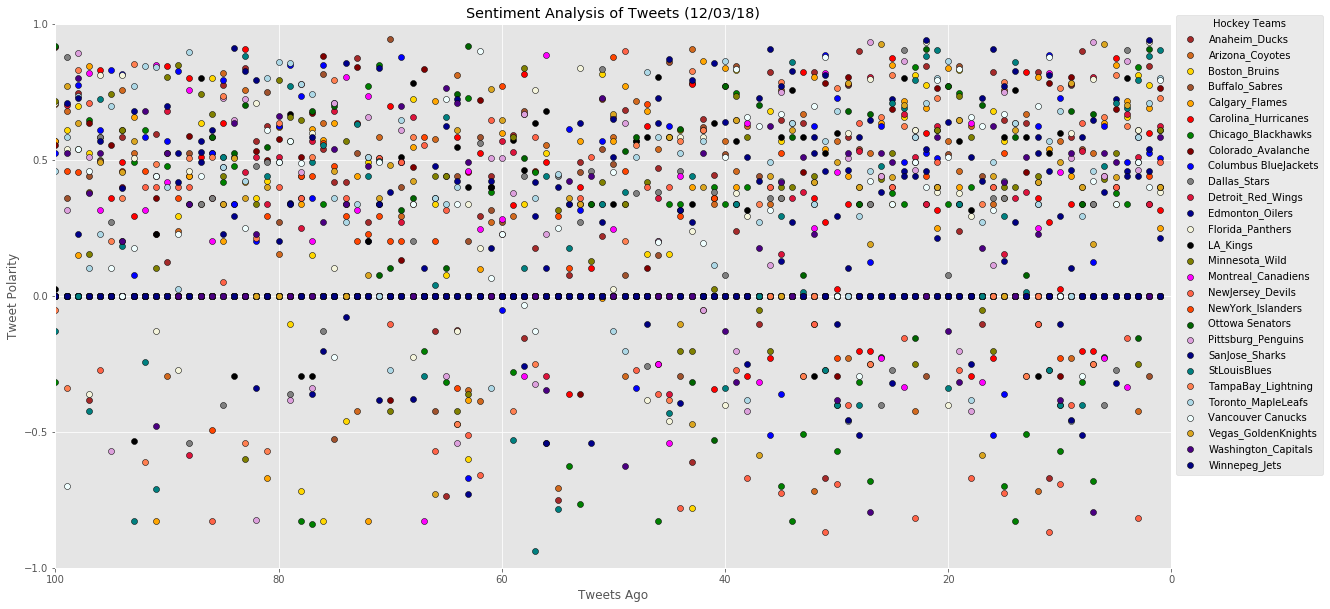

<Figure size 432x288 with 0 Axes>

In [9]:
# Scatter chart Sentiment Analysis of Media Tweets(mm/dd/yy)
# Each plot point will reflect the COMPOUND sentiment each tweet per network.
# Sort each plot point by its relative timestamp.
plt.figure(figsize=(20,10))
style.use('ggplot')
    
#  @AnaheimDucks scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@AnaheimDucks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@AnaheimDucks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="brown", label="Anaheim_Ducks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @ArizonaCoyotes scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@ArizonaCoyotes']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@ArizonaCoyotes']
plt.scatter(x_axis, y_axis, marker="o", facecolors="chocolate", label="Arizona_Coyotes", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @ NHLBruins scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLBruins']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLBruins']
plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", label="Boston_Bruins", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @BuffaloSabres  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@BuffaloSabres']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@BuffaloSabres']
plt.scatter(x_axis, y_axis, marker="o", facecolors="sienna", label="Buffalo_Sabres", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @NHLFlames  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLFlames']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLFlames']
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", label="Calgary_Flames", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @NHLCanes  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLCanes']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLCanes']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", label="Carolina_Hurricanes", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @NHLBlackhawks  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLBlackhawks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLBlackhawks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", label="Chicago_Blackhawks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @Avalanche  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Avalanche']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Avalanche']
plt.scatter(x_axis, y_axis, marker="o", facecolors="maroon", label="Colorado_Avalanche", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @BlueJacketsNHL scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@BlueJacketsNHL']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@BlueJacketsNHL']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", label="Columbus BlueJackets", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @DallasStars scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@DallasStars']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@DallasStars']
plt.scatter(x_axis, y_axis, marker="o", facecolors="grey", label="Dallas_Stars", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @DetroitRedWings scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@DetroitRedWings']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@DetroitRedWings']
plt.scatter(x_axis, y_axis, marker="o", facecolors="crimson", label="Detroit_Red_Wings", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @EdmontonOilers scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@EdmontonOilers']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@EdmontonOilers']
plt.scatter(x_axis, y_axis, marker="o", facecolors="darkblue", label="Edmonton_Oilers", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @FlaPanthers scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@FlaPanthers']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@FlaPanthers']
plt.scatter(x_axis, y_axis, marker="o", facecolors="beige", label="Florida_Panthers", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @LAKings scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@LAKings']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@LAKings']
plt.scatter(x_axis, y_axis, marker="o", facecolors="black", label="LA_Kings", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @mnwild scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@mnwild']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@mnwild']
plt.scatter(x_axis, y_axis, marker="o", facecolors="olive", label="Minnesota_Wild", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @CanadiensMTL scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@CanadiensMTL']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@CanadiensMTL']
plt.scatter(x_axis, y_axis, marker="o", facecolors="magenta", label="Montreal_Canadiens", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @NJDevils scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NJDevils']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NJDevils']
plt.scatter(x_axis, y_axis, marker="o", facecolors="tomato", label="NewJersey_Devils", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @NY_IslandersNHL scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NY_IslandersNHL']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NY_IslandersNHL']
plt.scatter(x_axis, y_axis, marker="o", facecolors="orangered", label="NewYork_Islanders", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @Senators scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Senators']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Senators']
plt.scatter(x_axis, y_axis, marker="o", facecolors="darkgreen", label="Ottowa Senators", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @penguins scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@penguins']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@penguins']
plt.scatter(x_axis, y_axis, marker="o", facecolors="plum", label="Pittsburg_Penguins", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @SanJoseSharks scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@SanJoseSharks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@SanJoseSharks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="navy", label="SanJose_Sharks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @StLouisBlues scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@StLouisBlues']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@StLouisBlues']
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", label="StLouisBlues", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @TBLightning scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@TBLightning']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@TBLightning']
plt.scatter(x_axis, y_axis, marker="o", facecolors="coral", label="TampaBay_Lightning", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @MapleLeafs scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@MapleLeafs']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@MapleLeafs']
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", label="Toronto_MapleLeafs", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @Canucks scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Canucks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Canucks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="azure", label="Vancouver Canucks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @GoldenKnights scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@GoldenKnights']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@GoldenKnights']
plt.scatter(x_axis, y_axis, marker="o", facecolors="goldenrod", label="Vegas_GoldenKnights", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @Capitals scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Capitals']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Capitals']
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", label="Washington_Capitals", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @NHLJets scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLJets']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLJets']
plt.scatter(x_axis, y_axis, marker="o", facecolors="navy", label="Winnepeg_Jets", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Tweets ({now})") 
plt.legend(title="Hockey Teams",bbox_to_anchor=(.9,.9),bbox_transform=plt.gcf().transFigure)
plt.xlim(100,0)
plt.ylim(-1.0,1.0)
plt.yticks([-1,-0.5,0,0.5,1])
plt.grid(which='major', color='white')
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Output/hockey_team_sentiment_scatter.png")

plt.show()
plt.tight_layout()

<Figure size 5760x4320 with 0 Axes>

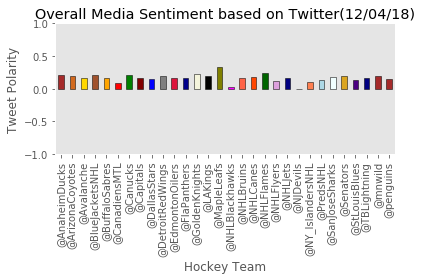

In [17]:
# Overall Media Sentiment based on Twitter(mm/dd/yy)
# x-axis - news network
# y-axis - Tweety polarity (-.20-.05)
plt.figure(figsize=(80,60))

vader_network_results_df.plot('Hockey Team', 'Average Compound Score', linewidth= .5, kind='bar',
                               color=['brown','chocolate','gold','sienna','orange','red',
                                     'green', 'maroon','blue','grey','crimson','darkblue',
                                     'beige','black','olive','magenta','tomato','orangered',
                                     'darkgreen','plum','navy','teal','coral','lightblue',
                                     'azure','goldenrod','indigo','navy'
                                    ],
                              legend=False,
                              edgecolor="black", alpha=0.9999)
# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Overall Media Sentiment based on Twitter({now})") 
#plt.ylim(-.20,.05)
plt.ylim(-1.0,1.0)
plt.yticks([-1,-0.5,0,0.5,1])
#plt.yticks([-0.20,-0.15,-.10,-0.05,0.00,0.05])
plt.grid(which='major')
plt.ylabel("Tweet Polarity")

# Save chart to png
plt.savefig("Output/sentiment_bar.png")

plt.tight_layout()
plt.show()